In [1]:
import numpy as np
from astropy.io import fits
import pandas as pd
from glob import glob
import matplotlib.pyplot as plt
from astropy.visualization import ZScaleInterval
import ipywidgets as widgets
from ipywidgets import interact
from astropy.table import QTable
from matplotlib.colors import LogNorm
import colorsys
from scipy.integrate import quad
from scipy.optimize import curve_fit

In [373]:
for file in glob(cigale+"*_best_model.fits"):
        name = file.split("/")[-1].replace("_best_model.fits","")
        print(name)
        path = hdul[1].data[hdul[1].data["id"] == name]["spectrum"][0][1:]
        
        z = results[1].data[results[1].data["id"] == name]["bayes.universe.redshift"][0]
        dz = results[1].data[results[1].data["id"] == name]["bayes.universe.redshift_err"][0]
        chi = results[1].data[results[1].data["id"] == name]["best.reduced_chi_square"][0]
        
        with fits.open(file) as sed:
            SED_wave = sed[1].data["wavelength"]/1000
            SED_Fnu = sed[1].data["Fnu"]
            
        with fits.open(path) as data:
            Raw_wave = data[1].data["WAVELENGTH"]
            Raw_Fnu = data[1].data["FLUX"]*1e3
            mask = SED_wave > Raw_wave.min()
            mask = np.logical_and(mask, SED_wave < Raw_wave.max())
        
        SED_wave = SED_wave[mask]
        SED_Fnu = SED_Fnu[mask]
        
        plt.figure(figsize=(12,5))
        plt.subplot(2,1,1)
        plt.title(fr"z = {round(z,2)} +/- {round(dz,2)}, $\chi^2$ = {round(chi,2)}")
        plt.plot(SED_wave,SED_Fnu)
        plt.plot(Raw_wave,Raw_Fnu,linestyle='dashed')
        #plt.xscale("log")
        #plt.yscale("log")
        plt.grid()
        plt.xlabel(r"$\lambda$ (µm)")
        plt
        plt.subplot(2,1,2)

        path = path.replace("prism1",'prism')
        with fits.open(path.replace("x1d","s2d")) as s2d:
            z1, z2 = ZScaleInterval().get_limits(s2d[1].data)
            plt.imshow(s2d[1].data,origin="lower",vmin=z1,vmax=z2)
        plt.show()
        

TypeError: can only concatenate list (not "str") to list

In [518]:
# Function to read and process spectra files
def read_spectra(file_path):
    data = pd.read_csv(file_path, sep=' ', skipfooter=1, skiprows=1, skipinitialspace=True, engine='python')
    data.columns = ["Intensity", "Wavelength", "Type", "Ref"]
    data["Wavelength"] /= 1e4
    return data

# Reading spectra data
He = read_spectra("./Test/He_spectra.txt")
H = read_spectra("./Test/H_spectra.txt")
O = read_spectra("./Test/O_spectra.txt")
C = read_spectra("./Test/C_spectra.txt")
N = read_spectra("./Test/N_spectra.txt")

HeI = He[He["Type"] == "HeI"]
HeII = He[He["Type"] == "HeII"]
OI = O[O["Type"] == "OI"]
OII = O[O["Type"] == "OII"]
CI = C[C["Type"] == "CI"]
CII = C[C["Type"] == "CII"]
NI = N[N["Type"] == "NI"]
NII = N[N["Type"] == "NII"]


with fits.open("./mastDownload/JWST/CEERS-NIRSPEC-P5-PRISM-MSATA/Final/jw01345-o063_s32304_nirspec_clear-prism_x1d.fits") as hdul:
        wave = hdul[1].data["WAVELENGTH"]
        flux = hdul[1].data["FLUX"]

# Function to update the plot based on redshift z
def update_plot(z):
    plt.figure(figsize=(12, 6))
    
    # Apply redshift transformation
    HeI_shifted = HeI["Wavelength"] * (1 + z)
    HeII_shifted = HeII["Wavelength"] * (1 + z)
    H_shifted = H["Wavelength"] * (1 + z)
    OI_shifted = OI["Wavelength"] * (1 + z)
    OII_shifted = OII["Wavelength"] * (1 + z)
    CI_shifted = CI["Wavelength"] * (1 + z)
    CII_shifted = CII["Wavelength"] * (1 + z)
    NI_shifted = NI["Wavelength"] * (1 + z)
    NII_shifted = NII["Wavelength"] * (1 + z)
    
    plt.bar(HeI_shifted, HeI["Intensity"], label="He I",width = (z+1)/1000)
    plt.bar(HeII_shifted, HeII["Intensity"], label="He II",width = (z+1)/1000)
    plt.bar(H_shifted, H["Intensity"], label="H I",width = (z+1)/1000)
    plt.bar(OI_shifted, OI["Intensity"], label="O I",width = (z+1)/1000)
    plt.bar(OII_shifted, OII["Intensity"], label="O II",width = (z+1)/1000)
    #plt.bar(CI_shifted, CI["Intensity"], label="C I",width = (z+1)/1000)
    #plt.bar(CII_shifted, CII["Intensity"], label="C II",width = (z+1)/1000)
    #plt.bar(NI_shifted, NI["Intensity"], label="N I",width = (z+1)/1000)
    #plt.bar(NII_shifted, NII["Intensity"], label="N II",width = (z+1)/1000)
    
    plt.vlines(91.2/1e3 * (1 + z), 0, 1000, color="blue")  # Adjust the upper limit as needed
    plt.legend()
    plt.xlabel("Wavelength (µm)")
    plt.ylabel("Intensity")
    plt.title(f"Spectra with Redshift z = {z}")
    plt.yscale('log')
    plt.xscale("log")
    plt.xlim(0.6,5.3)
    plt.grid()
    plt.show()

# Create an interactive slider for redshift z
interact(update_plot, z=widgets.FloatSlider(value=0, min=0, max=16, step=0.05, description='Redshift z'));

interactive(children=(FloatSlider(value=0.0, description='Redshift z', max=16.0, step=0.05), Output()), _dom_c…

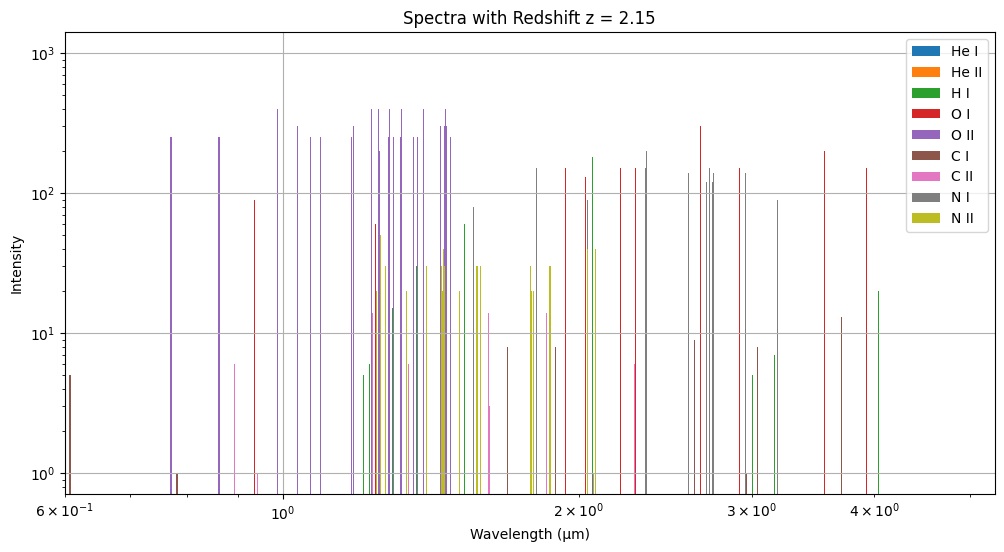

In [513]:
plt.figure(figsize=(12, 6))

z = 2.15

# Apply redshift transformation
HeI_shifted = HeI["Wavelength"] * (1 + z)
HeII_shifted = HeII["Wavelength"] * (1 + z)
H_shifted = H["Wavelength"] * (1 + z)
OI_shifted = OI["Wavelength"] * (1 + z)
OII_shifted = OII["Wavelength"] * (1 + z)
CI_shifted = CI["Wavelength"] * (1 + z)
CII_shifted = CII["Wavelength"] * (1 + z)
NI_shifted = NI["Wavelength"] * (1 + z)
NII_shifted = NII["Wavelength"] * (1 + z)

plt.bar(HeI_shifted, HeI["Intensity"], label="He I",width = (z+1)/1000)
plt.bar(HeII_shifted, HeII["Intensity"], label="He II",width = (z+1)/1000)
plt.bar(H_shifted, H["Intensity"], label="H I",width = (z+1)/1000)
plt.bar(OI_shifted, OI["Intensity"], label="O I",width = (z+1)/1000)
plt.bar(OII_shifted, OII["Intensity"], label="O II",width = (z+1)/1000)
plt.bar(CI_shifted, CI["Intensity"], label="C I",width = (z+1)/1000)
plt.bar(CII_shifted, CII["Intensity"], label="C II",width = (z+1)/1000)
plt.bar(NI_shifted, NI["Intensity"], label="N I",width = (z+1)/1000)
plt.bar(NII_shifted, NII["Intensity"], label="N II",width = (z+1)/1000)

plt.vlines(91.2/1e3 * (1 + z), 0, 1000, color="blue")  # Adjust the upper limit as needed
plt.legend()
plt.xlabel("Wavelength (µm)")
plt.ylabel("Intensity")
plt.title(f"Spectra with Redshift z = {z}")
plt.yscale('log')
plt.xscale("log")
plt.xlim(0.6,5.3)
plt.grid()
plt.show()

In [ ]:
with fits.open("./Cigale/out-5th/results.fits") as results:
    z = results[1].data["bayes.universe.redshift"]
    mask = ~np.isnan(z)
    ids = results[1].data["id"]
    table["redshift"] = z
    table_new = QTable(table[mask])
    
    print(table_new['redshift'])
    
    table_new.write("./mastDownload/JWST/cigale-data-good.fits")

In [2]:
with fits.open("./Cigale/out-final/results.fits") as results:
    table = results[1].data
    print(table.columns)

ColDefs(
    name = 'id'; format = '20A'
    name = 'bayes.attenuation.E_BV_factor'; format = 'D'
    name = 'bayes.attenuation.E_BV_factor_err'; format = 'D'
    name = 'bayes.attenuation.E_BV_lines'; format = 'D'; unit = 'mag'
    name = 'bayes.attenuation.E_BV_lines_err'; format = 'D'; unit = 'mag'
    name = 'bayes.attenuation.E_BVs'; format = 'D'; unit = 'mag'
    name = 'bayes.attenuation.E_BVs_err'; format = 'D'; unit = 'mag'
    name = 'bayes.nebular.logU'; format = 'D'
    name = 'bayes.nebular.logU_err'; format = 'D'
    name = 'bayes.nebular.zgas'; format = 'D'
    name = 'bayes.nebular.zgas_err'; format = 'D'
    name = 'bayes.stellar.metallicity'; format = 'D'
    name = 'bayes.stellar.metallicity_err'; format = 'D'
    name = 'bayes.universe.age'; format = 'D'; unit = 'Myr'
    name = 'bayes.universe.age_err'; format = 'D'; unit = 'Myr'
    name = 'bayes.universe.redshift'; format = 'D'
    name = 'bayes.universe.redshift_err'; format = 'D'
    name = 'bayes.sfh.sfr'; for

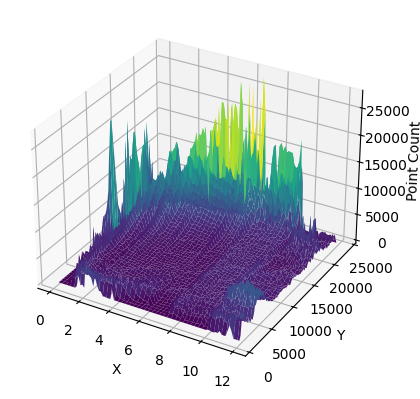

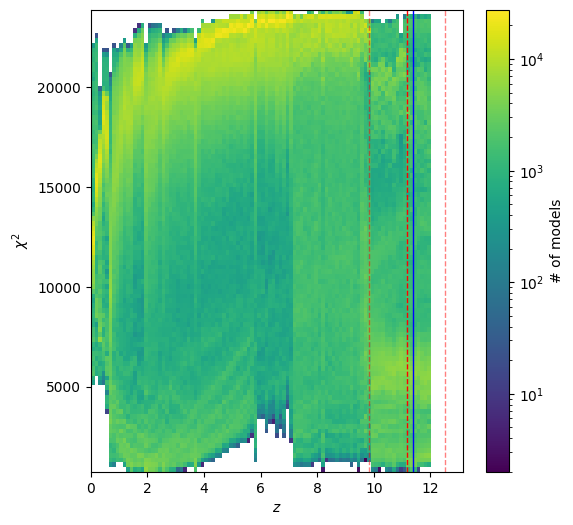

In [44]:
chilist = ["nirspec_P7_s02675"]

with fits.open("./cigale/out-5th/results.fits") as hdul:
    z_bayes = hdul[1].data["bayes.universe.redshift"]
    z_bayes_err = hdul[1].data["bayes.universe.redshift_err"]
    z_best = hdul[1].data["best.universe.redshift"]
    ids = hdul[1].data["id"]

for file in chilist:
    redshift_bayes = z_bayes[ids == file][0]
    redshift_bayes_err = z_bayes_err[ids == file][0]
    redshift_best = z_best[ids == file][0]
    
    z = np.array([])
    chi2 = np.array([])
    for file in glob(f"./Cigale/chi2/{file}/*universe.redshift*"):

        with fits.open(file) as hdul:
            z = np.append(z,hdul[1].data["universe.redshift"])
        with fits.open(file.replace("universe.redshift","chi2")) as hdul:
            chi2 = np.append(chi2,hdul[1].data["chi2"])

    #chi2 = np.exp(-chi2**2/2)
    points = np.array([z,chi2]).T
    points = points[~np.isnan(points).any(axis=1)]

    N = 96
    xmin, ymin = points.min(axis=0)
    xmax, ymax = points.max(axis=0)

    dz = (xmax - xmin)/N
    dchi = (ymax - ymin)/N

    x_edges = np.arange(xmin, xmax + dz, dz)
    y_edges = np.arange(ymin, ymax + dchi, dchi)

    H, x_edges, y_edges = np.histogram2d(points[:, 0], points[:, 1], bins=[x_edges, y_edges])

    x_centers = (x_edges[:-1] + x_edges[1:]) / 2
    y_centers = (y_edges[:-1] + y_edges[1:]) / 2
    x_grid, y_grid = np.meshgrid(x_centers, y_centers)

    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.plot_surface(x_grid, y_grid, H.T, cmap='viridis')

    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Point Count')
    plt.show()

    plt.figure(figsize=(6,6))
    plt.imshow(H.T,origin='lower',extent=[xmin,xmax,ymin,ymax],aspect="auto",norm=LogNorm())
    plt.colorbar(label="# of models")
    plt.vlines(redshift_bayes,ymin,ymax,color='r',linewidth=1,linestyle="dashed")
    plt.vlines((redshift_bayes-redshift_bayes_err, redshift_bayes+redshift_bayes_err),
               ymin,ymax,color='r',linewidth=1,linestyle="dashed",alpha=0.5)
    plt.vlines(redshift_best,ymin,ymax,color='b',linewidth=1)
    plt.xlabel(r"$z$")
    plt.ylabel(r"$\chi^2$")
    plt.show()

In [8]:
with fits.open("./Cigale/out-final2/results.fits") as results:
    table = results[1].data
#print(table.columns)
z = table["bayes.universe.redshift"]
dz = table["bayes.universe.redshift_err"]

z = z[~np.isnan(z)]
dz = dz[~np.isnan(dz)]

params = []

for i,bayes in enumerate(table.columns):
    bayes = bayes.name
    if not "bayes" in bayes:
        continue
    if "err" in bayes:
        continue
    if "dust" in bayes:
        continue
    if "age" in bayes:
        continue
    params.append(bayes)
    
print(len(params)*(len(params)-1)/2)
print(params)

946.0
['bayes.attenuation.B_B90', 'bayes.attenuation.E_BV_factor', 'bayes.attenuation.E_BV_lines', 'bayes.attenuation.E_BVs', 'bayes.attenuation.FUV', 'bayes.attenuation.V_B90', 'bayes.attenuation.powerlaw_slope', 'bayes.attenuation.uv_bump_amplitude', 'bayes.attenuation.uv_bump_wavelength', 'bayes.attenuation.uv_bump_width', 'bayes.nebular._12logOH', 'bayes.nebular.f_esc', 'bayes.nebular.lines_width', 'bayes.nebular.logU', 'bayes.nebular.ne', 'bayes.nebular.zgas', 'bayes.param.beta0_calz94', 'bayes.param.beta_calz94', 'bayes.sfh.f_burst', 'bayes.sfh.tau_burst', 'bayes.sfh.tau_main', 'bayes.stellar.imf', 'bayes.stellar.metallicity', 'bayes.universe.luminosity_distance', 'bayes.universe.redshift', 'bayes.sfh.integrated', 'bayes.sfh.sfr', 'bayes.sfh.sfr100Myrs', 'bayes.sfh.sfr10Myrs', 'bayes.stellar.lum', 'bayes.stellar.lum_ly', 'bayes.stellar.lum_ly_old', 'bayes.stellar.lum_ly_young', 'bayes.stellar.lum_old', 'bayes.stellar.lum_young', 'bayes.stellar.m_gas', 'bayes.stellar.m_gas_old', '

In [9]:
def affine(x,a,b):
    return a*x+b

def fitAffine(X,Y,dY,xmin,xmax):
    a_guess = (Y.max() - Y.min()) / (X.max() - X.min())
    b_guess = Y.min()
    coeff,err = curve_fit(affine, X,Y,sigma=dY,p0=[a_guess,b_guess])
    
    x = np.linspace(xmin,xmax,200)
    y = affine(x,*coeff)
    
    num_sims = 1000
    sim_params = np.random.multivariate_normal(coeff, err, size=num_sims)
    sim_vals = [affine(x, *params) for params in sim_params]
    min_vals = np.min(sim_vals, axis=0)
    max_vals = np.max(sim_vals, axis=0)
    
    return x,y,min_vals,max_vals,coeff,err

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import colorsys

def plotBayesParams(abscisse, ordonnee, table, logX=False, logY=False, redshiftColor=False, xlabel=None, ylabel=None):
    Y = table[ordonnee]
    dY = table[ordonnee+"_err"]
    X = table[abscisse]
    dX = table[abscisse+"_err"]
    ids = table["id"]
    
    X = X[~np.isnan(Y)]
    dX = dX[~np.isnan(Y)]
    dY = dY[~np.isnan(Y)]
    ids = ids[~np.isnan(Y)]
    Y = Y[~np.isnan(Y)]
    

    mask = ~np.logical_or(dX == 0, dY == 0)
    X = X[mask]
    Y = Y[mask]
    dX = dX[mask]
    dY = dY[mask]
    ids = ids[mask]
    redshift = table["bayes.universe.redshift"]
    redshift = redshift[~np.isnan(table[ordonnee])]
    redshift = redshift[mask]
    
    mask = redshift < 9
    redshift = redshift[mask]
    X = X[mask]
    Y = Y[mask]
    dX = dX[mask]
    dY = dY[mask]
    ids = ids[mask]

    if len(X) == 0:
        return
    
    if logX:
        dX = 1/X*dX/np.log(10)
        X = np.log10(X)
    if logY:
        dY = 1/Y*dY/np.log(10)
        Y = np.log10(Y)
    if redshiftColor:
        N = 8
        fig, axs = plt.subplots(ncols=N, nrows=1, figsize=(3*N, 3))

        axs[0].set_ylabel(ylabel, fontsize=12)
        ymin = Y.min()
        ymax = Y.max()
        xmin = X.min()
        xmax = X.max()
        
        """indice_to_ignore = [
            [6],
            [71,131,41,70,59,11,23,72,6,7,22,26,124,86,128,8,141,133,143,132,16,40,123,65,43,10],
            [84,60,143,139,43,80,95,62,8,97,16,101,175,128,65,38,49,35,21,103,94,41,77,32,134,0,113,19,45,108,67,86,117,28,56,168,166,2,25,161,65,27,150,169,182,66,179,178,55,31,166,164,52,58,83,],
            [3,15,6,7,26,35,32,8,37,4,10,15,3,20,11,14,13,8,37,9,29,21,24,19,0,5,1,30,34],
            [1,0,14,11,6,3,16,12,4,15,18,2,20,5],
            [14,18,19,0,1,6,2,10,16,17,12,20],
            [14,13,7,11,8,10,4,5],
            [11,15,16,1,4,5,12]            
        ]"""

        for i in range(N):
            mask = np.logical_and(redshift < i+1, redshift >= i)
            if np.any(mask):
                X_bin = X[mask]
                Y_bin = Y[mask]
                dY_bin = dY[mask]
                ids_bin = ids[mask]
                
                ignore = ~np.array([False for _ in range(len(X_bin))])
                X_fit = X_bin[ignore]
                Y_fit = Y_bin[ignore]
                dY_fit = dY_bin[ignore]

                xfit,yfit,yminfit,ymaxfit,coeff,err = fitAffine(X_fit,Y_fit,dY_fit,xmin,xmax)
                print(f"np.array([{coeff[0]},{err[0][0]},{coeff[1]},{err[1][1]}])")

                axs[i].errorbar(X_bin, Y_bin, yerr=dY_bin, linestyle="none", 
                                color=colorsys.hls_to_rgb(i/N, 0.5, 0.7), marker='.',
                                label=f"{round(i, 2)} < z < {round(i+1, 2)}", capsize=3)
                axs[i].plot(xfit,yfit,color="k",label=f"a = {round(coeff[0],2)}, b = {round(coeff[1],2)}")
                axs[i].fill_between(xfit,yminfit,ymaxfit,color="gray",alpha=0.3)
                axs[i].set_xlabel(xlabel, fontsize=12)
                axs[i].legend(fontsize=12,loc='lower left')
                axs[i].grid()
                axs[i].tick_params(labelleft=False)
                axs[i].set_ylim(ymin,ymax)
                axs[i].set_xlim(xmin,xmax)
                plt.subplots_adjust(wspace=0, hspace=0)

        axs[0].tick_params(labelleft=True)
        plt.show()

    else:
        plt.errorbar(X, Y, yerr=dY, xerr=dX, linestyle="none", color="k", marker='.', alpha=0.7,label="Data")
        
        N = 10 
        bins = np.linspace(np.min(X), np.max(X), N)

        # Digitize X data into bins
        bin_indices = np.digitize(X, bins)

        # Initialize lists to store the binned values
        binned_X = []
        binned_Y = []
        binned_dZ = []

        # Calculate means and uncertainties for each bin
        for i in range(1, len(bins)):
            bin_mask = bin_indices == i
            if np.any(bin_mask):
                X_bin = X[bin_mask]
                Y_bin = Y[bin_mask]
                dY_bin = dY[bin_mask]

                mean_X = (bins[i] + bins[i-1]) / 2
                mean_Y = np.mean(Y_bin)
                mean_dY = np.mean(dY_bin**2)
                mean_dY += np.var(Y_bin)
                mean_dY = np.sqrt(mean_dY/2)

                binned_X.append(mean_X)
                binned_Y.append(mean_Y)
                binned_dZ.append(mean_dY)

        # Convert lists to numpy arrays for plotting
        binned_X = np.array(binned_X)
        binned_Y = np.array(binned_Y)
        binned_dZ = np.array(binned_dZ)
        
        plt.plot(binned_X,binned_Y,color='r',label="Moyenne")
        plt.fill_between(binned_X,binned_Y-binned_dZ,binned_Y+binned_dZ,color='r',alpha=0.4)

        plt.ylabel(ylabel, fontsize=12)
        plt.xlabel(xlabel, fontsize=12)
        plt.legend(fontsize=12)
        plt.subplots_adjust(wspace=0, hspace=0)
        plt.grid()


np.array([0.9328547972537691,0.0005541122117687402,-8.241702356172446,0.03567944315238193])
np.array([0.748836470783178,0.0011869074669541466,-6.521757019168039,0.09089050824178513])
np.array([0.517405632563629,0.0011811480004181448,-4.149032977752797,0.09130168283705417])
np.array([0.40568816816889336,0.0073179928072881345,-2.9446194334010265,0.5432959398810138])
np.array([0.3553387867099534,0.007157586416461043,-2.26075129941881,0.6234174383943898])
np.array([0.553649210942808,0.0069922311152888815,-4.11111648255081,0.5891517753797773])
np.array([0.032291563352369615,0.10036634615420671,0.3121021341717343,7.783847466308199])
np.array([1.0423017598379591,0.01757368789653379,-8.59892590544803,1.838653342717981])


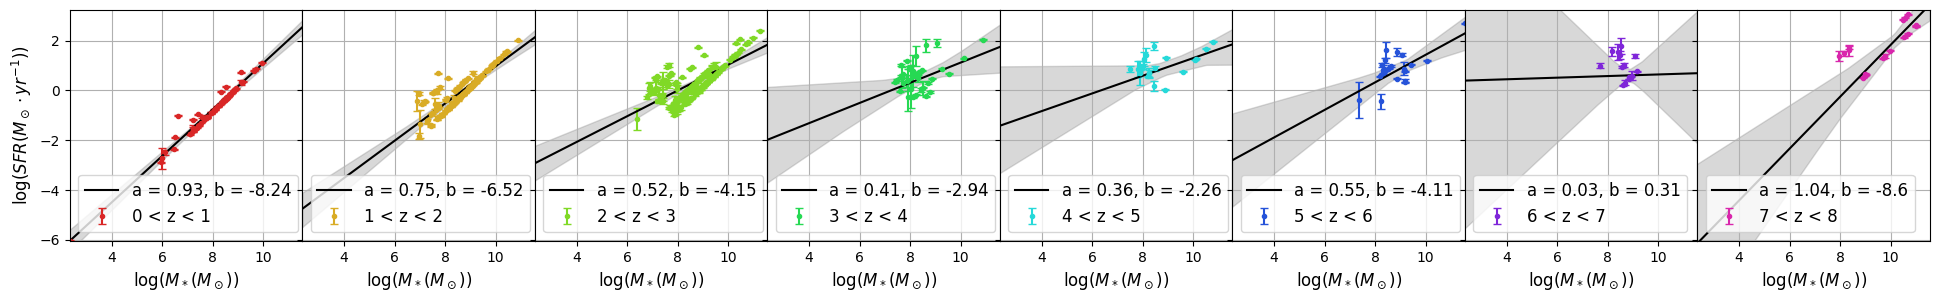

In [11]:
%matplotlib inline

plotBayesParams("bayes.stellar.m_star",
                "bayes.sfh.sfr",
                table,
                logX=True,
                logY=True,
                redshiftColor=True,
                xlabel=r"$\log(M_* (M_\odot))$", 
                ylabel=r"$\log(SFR (M_\odot \cdot yr^{-1}))$")

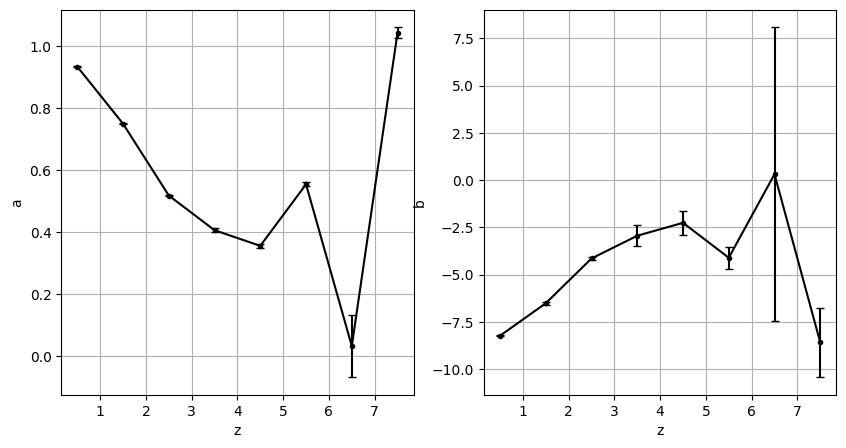

In [12]:
z = np.linspace(0.5,7.5,8)
age = [8628,4316,2645,1823,1351,1052,849,704]

coeffs = np.array([np.array([0.9328547972537691,0.0005541122117687402,-8.241702356172446,0.03567944315238193]),
                np.array([0.748836470783178,0.0011869074669541466,-6.521757019168039,0.09089050824178513]),
                np.array([0.517405632563629,0.0011811480004181448,-4.149032977752797,0.09130168283705417]),
                np.array([0.40568816816889336,0.0073179928072881345,-2.9446194334010265,0.5432959398810138]),
                np.array([0.3553387867099534,0.007157586416461043,-2.26075129941881,0.6234174383943898]),
                np.array([0.553649210942808,0.0069922311152888815,-4.11111648255081,0.5891517753797773]),
                np.array([0.032291563352369615,0.10036634615420671,0.3121021341717343,7.783847466308199]),
                np.array([1.0423017598379591,0.01757368789653379,-8.59892590544803,1.838653342717981])
])

a,da,b,db = coeffs.T

plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.errorbar(z,a,yerr=da,color="k",marker='.',capsize=3)
plt.grid()
plt.xlabel("z")
plt.ylabel("a")

plt.subplot(1,2,2)
plt.errorbar(z,b,yerr=db,color="k",marker='.',capsize=3)
plt.grid()
plt.xlabel("z")
plt.ylabel("b")
plt.show()

In [13]:
%matplotlib qt

with fits.open("cigale/out-5th/results.fits") as hdul:

    z = hdul[1].data["bayes.universe.redshift"]
    dz = hdul[1].data["bayes.universe.redshift_err"]
    ids = hdul[1].data["id"]
mask = z >= 9

ids = ids[mask]
z = z[mask]
dz = dz[mask]

print(np.array([ids,z,dz]).T)

ImportError: Cannot load backend 'qtagg' which requires the 'qt' interactive framework, as 'headless' is currently running

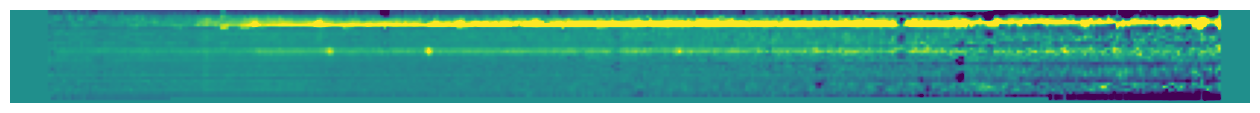

nirspec_P4_s19960


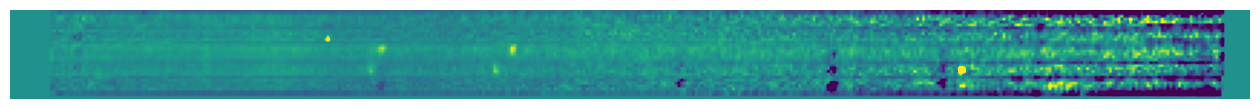

nirspec_P5_s14754


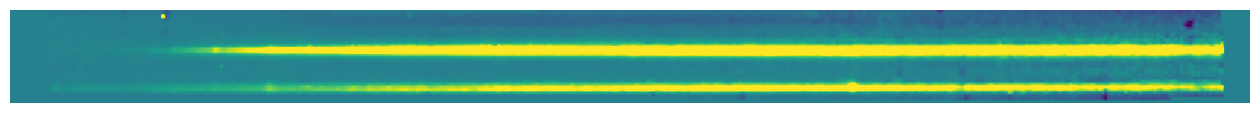

nirspec_P7_s02962


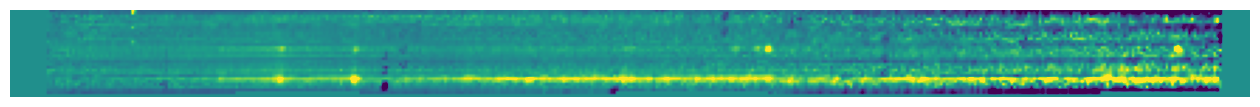

nirspec_P7_s23642
['nirspec_P11_s12459' 'nirspec_P11_s21913' 'nirspec_P12_s01756'
 'nirspec_P4_s00386' 'nirspec_P4_s00502' 'nirspec_P4_s08656'
 'nirspec_P4_s19960' 'nirspec_P5_s00157' 'nirspec_P5_s07668'
 'nirspec_P5_s12771' 'nirspec_P5_s14754' 'nirspec_P7_s01651'
 'nirspec_P7_s02962' 'nirspec_P7_s23642']


In [14]:
with fits.open('./cigale/out-final2/results.fits') as hdul:
    ids = hdul[1].data["id"]
    second = [x for x in ids if "-1" in x]
    primary = np.array([x for x in ids if x+"-1" in second])
    second = np.array([x for x in second if x[:-2] in primary])
    
    indices = np.argsort(primary)
    primary = primary[indices]
    second = second[indices]
    ignore = ["nirspec_P11_s12459",'nirspec_P11_s21913','nirspec_P12_s01756','nirspec_P4_s00386','nirspec_P4_s00502',
             'nirspec_P4_s08656','nirspec_P5_s00157','nirspec_P5_s07668','nirspec_P5_s12771','nirspec_P7_s01651']
    
with fits.open("./mastDownload/JWST/cigale-data-good.fits") as hdul:
    for _ in primary:
        if _ in ignore:
            continue
        path = hdul[1].data[hdul[1].data["id"] == _]["spectrum"][0][1:]
        
        with fits.open(path.replace('x1d',"s2d")) as s2d:
            plt.figure(figsize=(16,8))
            z1,z2 = ZScaleInterval().get_limits(s2d[1].data)
            plt.imshow(s2d[1].data,origin="lower",vmin=z1,vmax=z2)
            #plt.title(_)
            plt.axis("off")
            plt.show()
            print(_)
    
    print(primary)

In [15]:
from matplotlib.widgets import LassoSelector
class SelectFromCollection:
    """
    Select indices from a matplotlib collection using `LassoSelector`.

    Selected indices are saved in the `ind` attribute. This tool fades out the
    points that are not part of the selection (i.e., reduces their alpha
    values). If your collection has alpha < 1, this tool will permanently
    alter the alpha values.

    Note that this tool selects collection objects based on their *origins*
    (i.e., `offsets`).

    Parameters
    ----------
    ax : `~matplotlib.axes.Axes`
        Axes to interact with.
    collection : `matplotlib.collections.Collection` subclass
        Collection you want to select from.
    alpha_other : 0 <= float <= 1
        To highlight a selection, this tool sets all selected points to an
        alpha value of 1 and non-selected points to *alpha_other*.
    """

    def __init__(self, ax, collection, alpha_other=0.3):
        self.canvas = ax.figure.canvas
        self.collection = collection
        self.alpha_other = alpha_other

        self.xys = collection.get_offsets()
        self.Npts = len(self.xys)

        # Ensure that we have separate colors for each object
        self.fc = collection.get_facecolors()
        if len(self.fc) == 0:
            raise ValueError('Collection must have a facecolor')
        elif len(self.fc) == 1:
            self.fc = np.tile(self.fc, (self.Npts, 1))

        self.lasso = LassoSelector(ax, onselect=self.onselect)
        self.ind = []

    def onselect(self, verts):
        path = Path(verts)
        self.ind = np.nonzero(path.contains_points(self.xys))[0]
        self.fc[:, -1] = self.alpha_other
        self.fc[self.ind, -1] = 1
        self.collection.set_facecolors(self.fc)
        self.canvas.draw_idle()

    def disconnect(self):
        self.lasso.disconnect_events()
        self.fc[:, -1] = 1
        self.collection.set_facecolors(self.fc)
        self.canvas.draw_idle()

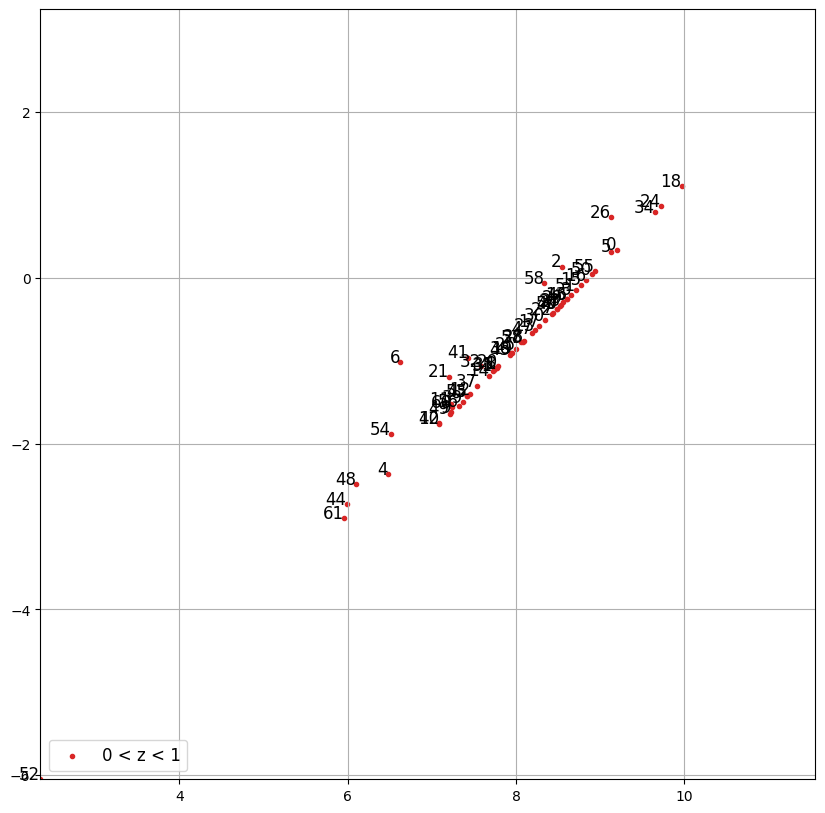

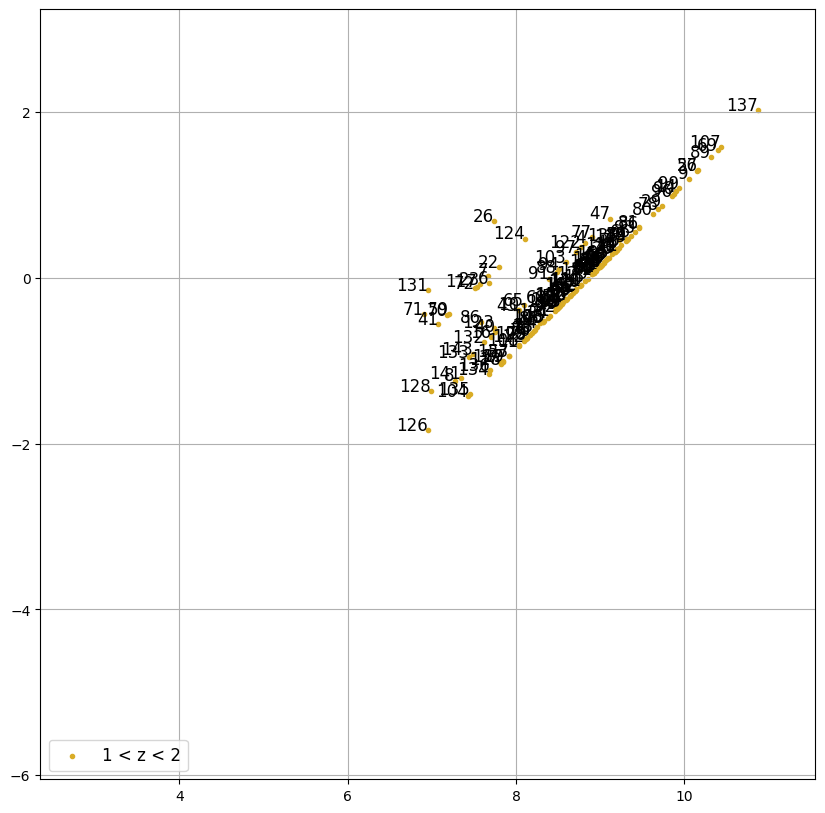

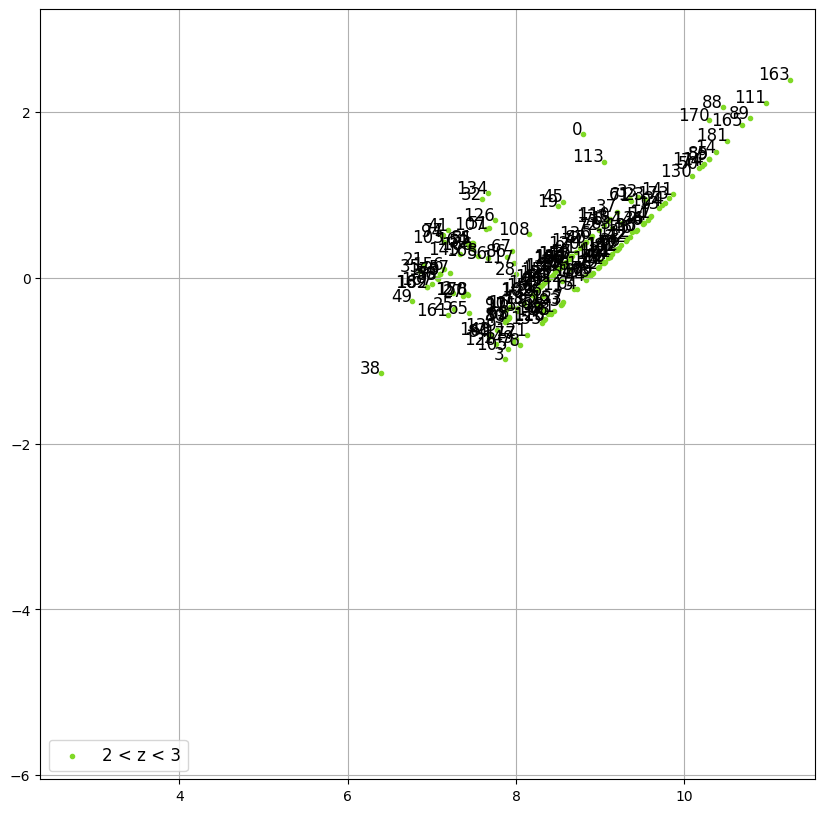

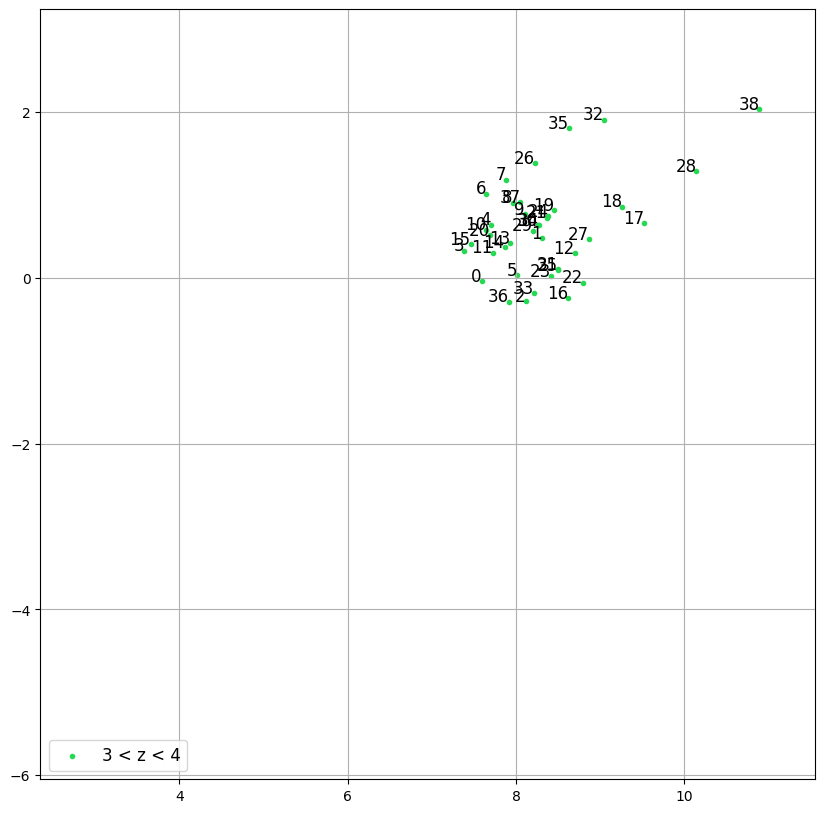

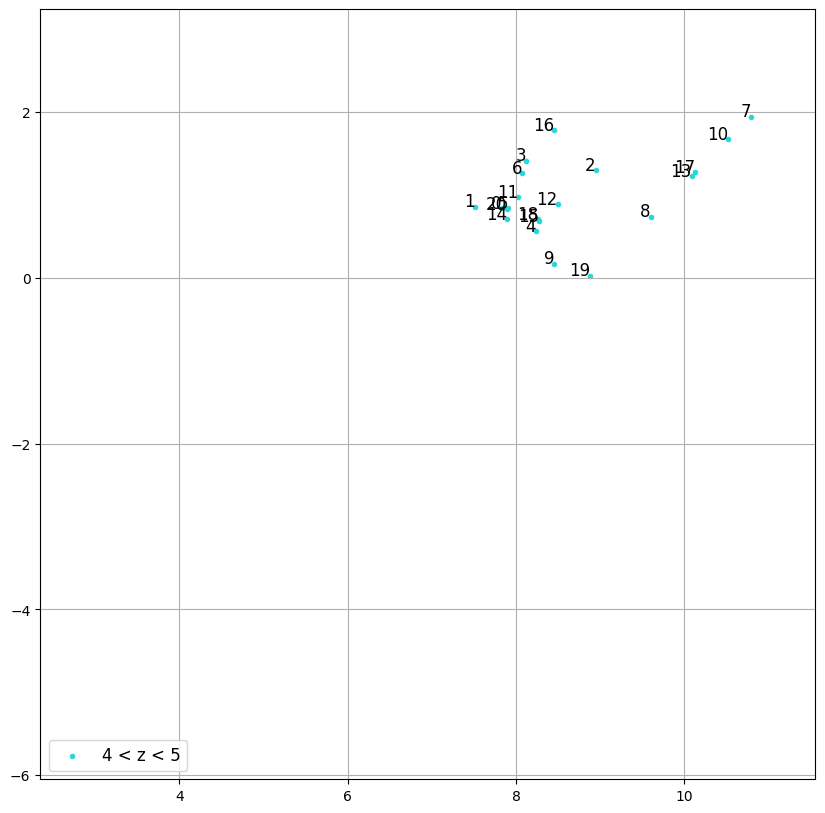

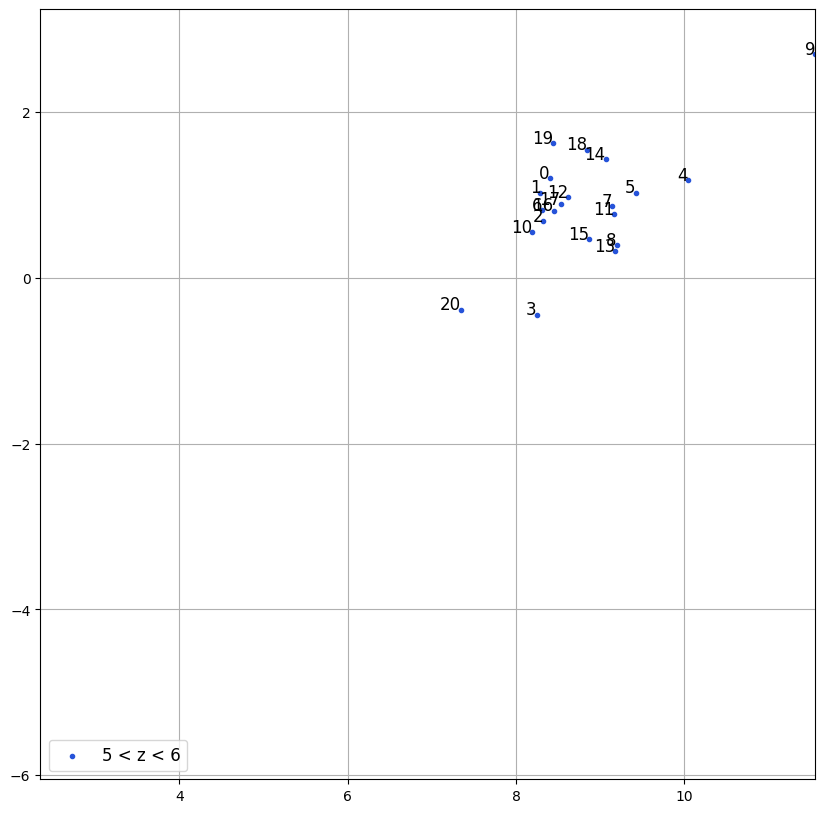

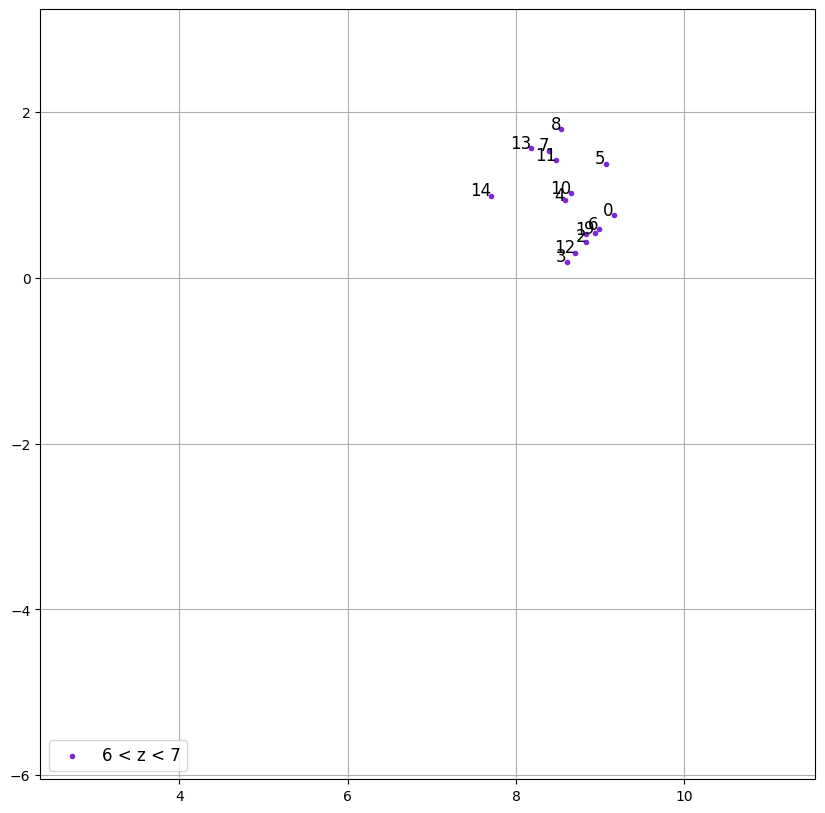

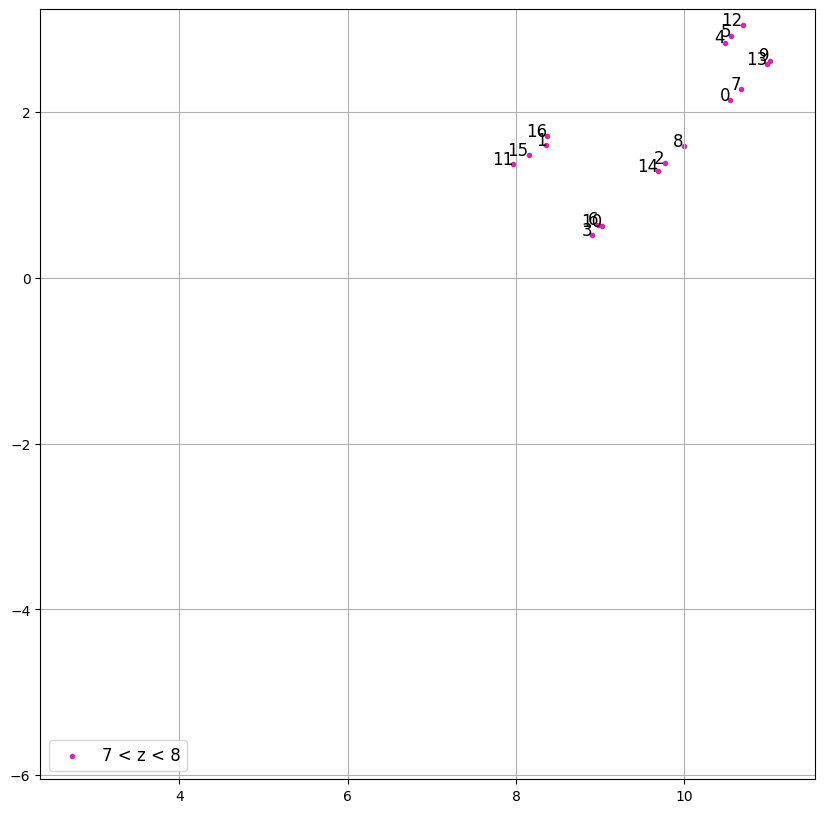

In [16]:


plt.close("all")

X = table["bayes.stellar.m_star"]
dX = table["bayes.stellar.m_star_err"]
Y = table["bayes.sfh.sfr"]
dY = table["bayes.sfh.sfr_err"]
ids = table["id"]

X = X[~np.isnan(Y)]
dX = dX[~np.isnan(Y)]
dY = dY[~np.isnan(Y)]
ids = ids[~np.isnan(Y)]
Y = Y[~np.isnan(Y)]


mask = ~np.logical_or(dX == 0, dY == 0)
X = X[mask]
Y = Y[mask]
dX = dX[mask]
dY = dY[mask]
ids = ids[mask]
redshift = table["bayes.universe.redshift"]
redshift = redshift[~np.isnan(table["bayes.stellar.m_star"])]
redshift = redshift[mask]

mask = redshift < 9
redshift = redshift[mask]
X = X[mask]
Y = Y[mask]
dX = dX[mask]
dY = dY[mask]
ids = ids[mask]

dX = 1/X*dX/np.log(10)
X = np.log10(X)
dY = 1/Y*dY/np.log(10)
Y = np.log10(Y)

N = 8

ymin = Y.min()
ymax = Y.max()
xmin = X.min()
xmax = X.max()



for i in range(N):
    fig = plt.figure(figsize=(10,10))
    mask = np.logical_and(redshift < i+1, redshift >= i)
    
    if np.any(mask):
        X_bin = X[mask]
        Y_bin = Y[mask]
        dY_bin = dY[mask]
        ids_bin = ids[mask]

        #print(ids_bin)

        #xfit,yfit,yminfit,ymaxfit,coeff,err = fitAffine(X_bin,Y_bin,dY_bin,xmin,xmax)

        pts = plt.scatter(X_bin, Y_bin, 
                        color=colorsys.hls_to_rgb(i/N, 0.5, 0.7), marker='.',
                        label=f"{round(i, 2)} < z < {round(i+1, 2)}")
        #plt.plot(xfit,yfit,color="k",label=f"a = {round(coeff[0],2)}, b = {round(coeff[1],2)}")
        #plt.fill_between(xfit,yminfit,ymaxfit,color="gray",alpha=0.3)
        plt.legend(fontsize=12,loc='lower left')
        plt.grid()
        plt.ylim(ymin,ymax)
        plt.xlim(xmin,xmax)
        
        for i, label in enumerate(range(len(ids_bin))):
            plt.text(X_bin[i], Y_bin[i], label, fontsize=12, ha='right')
        
    plt.show()


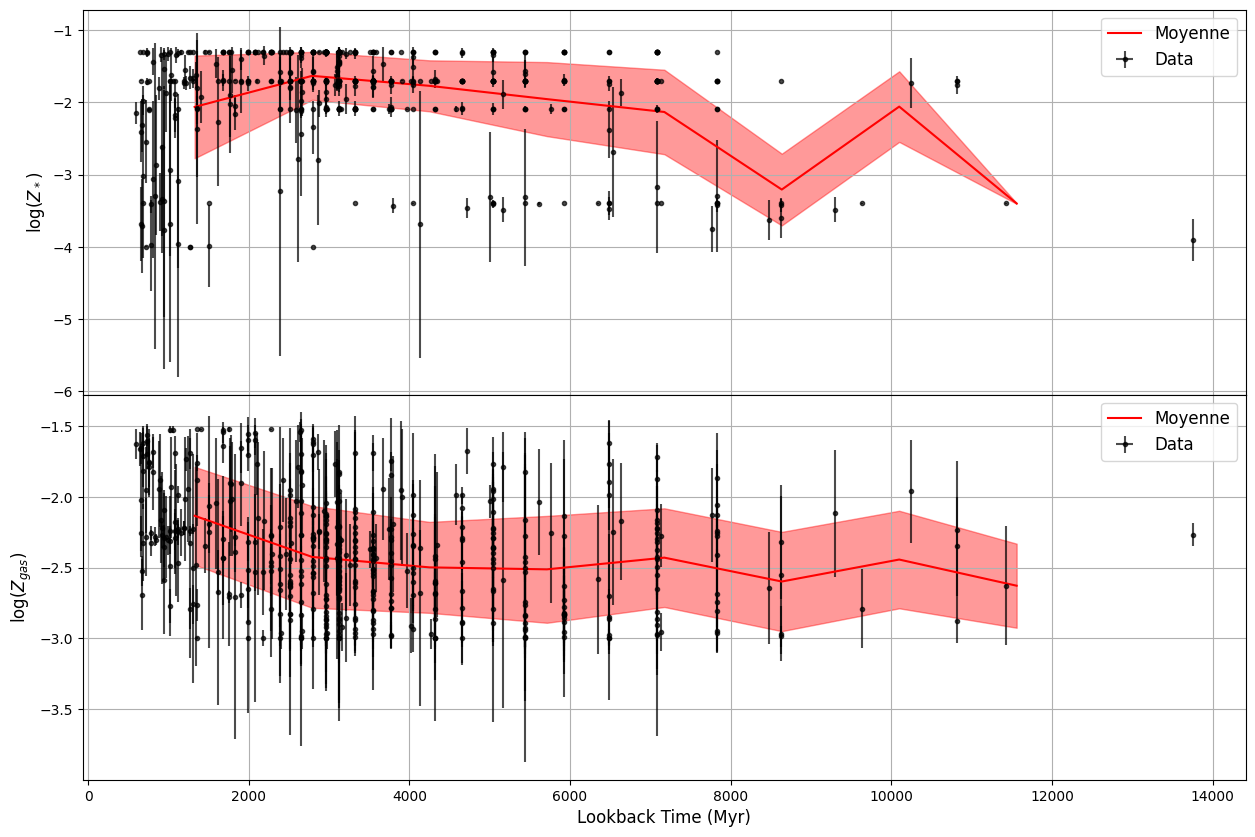

In [17]:
plt.figure(figsize=(15, 10))
plt.subplot(2,1,1)
plotBayesParams("bayes.universe.age",
                "bayes.stellar.metallicity",
                table,
                logY=True,
                xlabel=r"Lookback Time (Myr)", 
                ylabel=r"$\log(Z_*)$")

plt.subplot(2,1,2)

plotBayesParams("bayes.universe.age",
                "bayes.nebular.zgas",
                table,
                logY=True,
                xlabel=r"Lookback Time (Myr)", 
                ylabel=r"$\log(Z_{gas})$")

plt.show()

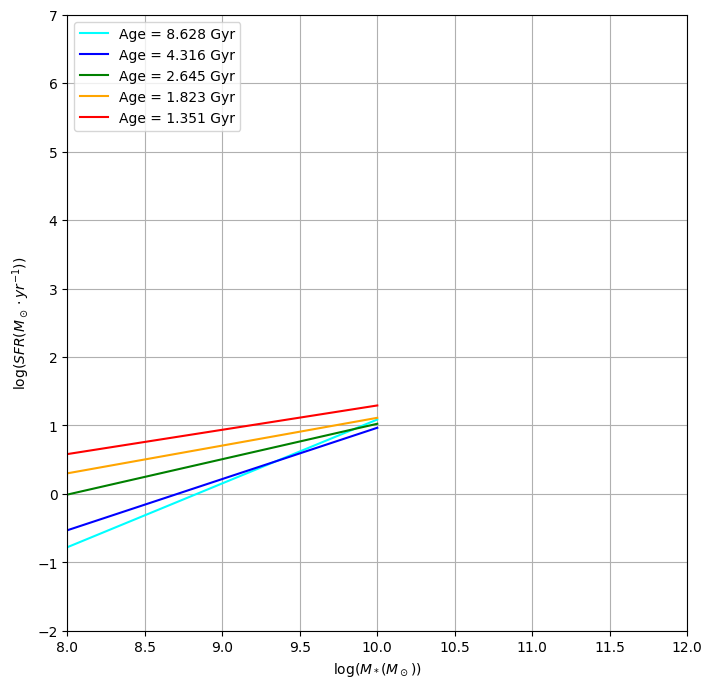

In [24]:
x = np.linspace(6,10,200)
age = [8.628,4.316,2.645,1.823,1.351]
colors = ["cyan","blue","green","orange","red"]

plt.figure(figsize=(8,8))
for i in range(len(a)-3):
    A = a[i]
    B = b[i]
    y = A*x+B
    
    plt.plot(x,y,color=colors[i],label=f"Age = {age[i]} Gyr")

plt.xlabel(r"$\log(M_* (M_\odot))$")
plt.ylabel(r"$\log(SFR (M_\odot \cdot yr^{-1}))$")
plt.ylim((-2,7))
plt.xlim(8,12)
plt.legend(loc='upper left')
plt.grid()
plt.show()